In [76]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as mpatches
import math
import matplotlib.lines as mlines
import os
import cv2 as cv
from IPython.display import Video
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
from statistics import mean
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure

In [77]:
#cable test

In [78]:
nummeas = 200;
frames = 10;
imgs1_short = np.zeros([nummeas,frames,256,320])
imgs2_short = np.zeros([nummeas,frames,256,320])
temps1 = np.zeros(nummeas)
temps2 = np.zeros(nummeas)
time_stamps = np.zeros(nummeas)

for i in range(nummeas):
    with h5py.File('C://Users//khart//Documents//Summer2022Campaign//IRCSP1//TestRuns//shortcable_20C//meas_' + str(i+1) + '.h5', "r") as f:


        # Get the data
        imgs1_short[i,:,:,:] = np.array(f[list(f.keys())[0]])
        imgs2_short[i,:,:,:] = np.array(f[list(f.keys())[1]])
        temps1[i] = np.array(f[list(f.keys())[2]])
        temps2[i] = np.array(f[list(f.keys())[3]])
      

In [79]:
nummeas = 200;
frames = 10;
imgs1_long = np.zeros([nummeas,frames,256,320])
imgs2_long = np.zeros([nummeas,frames,256,320])
temps1 = np.zeros(nummeas)
temps2 = np.zeros(nummeas)
time_stamps = np.zeros(nummeas)

for i in range(nummeas):
    with h5py.File('C://Users//khart//Documents//Summer2022Campaign//IRCSP1//TestRuns//longcable_20C//meas_' + str(i+1) + '.h5', "r") as f:


        # Get the data
        imgs1_long[i,:,:,:] = np.array(f[list(f.keys())[0]])
        imgs2_long[i,:,:,:] = np.array(f[list(f.keys())[1]])
        temps1[i] = np.array(f[list(f.keys())[2]])
        temps2[i] = np.array(f[list(f.keys())[3]])
    

In [80]:
imgs1_long = np.mean(imgs1_long,axis=1)
imgs1_short = np.mean(imgs1_short,axis=1)

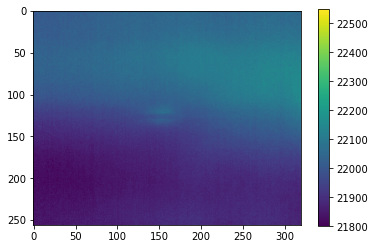

In [84]:
i = 199
plt.imshow(imgs1_short[i])
plt.colorbar()
plt.clim(21800,22550)
plt.show()

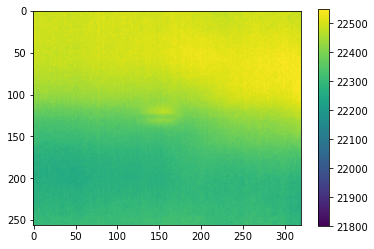

In [85]:
plt.imshow(imgs1_long[i])
plt.colorbar()
plt.clim(21800,22550)
plt.show()

In [86]:
y11= []
y21= []
for i in range(200):
    av1 = np.mean(imgs1_long[i])
    av2 = np.mean(imgs1_short[i])
    y11.append(av1)
    y21.append(av2)

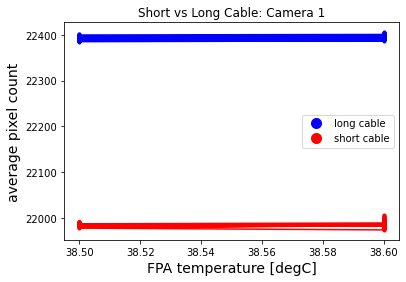

In [87]:
blue_star = mlines.Line2D([], [], marker='o', linestyle='None',
                          markersize=10,color = 'blue', label='long cable')
red_star = mlines.Line2D([], [], marker='o', linestyle='None',
                          markersize=10,color = 'red',label='short cable')


plt.title('Short vs Long Cable: Camera 1')
plt.legend(handles=[blue_star, red_star])
plt.plot(temps1,y11, color="blue", marker=".")
plt.xlabel("FPA temperature [degC]",fontsize=14)
plt.ylabel("average pixel count",fontsize=14)
plt.plot(temps1,y21,color="red",marker=".")
plt.show()

In [88]:
y12= []
y22= []
for i in range(200):
    av1 = np.mean(imgs2_long[i])
    av2 = np.mean(imgs2_short[i])
    y12.append(av1)
    y22.append(av2)

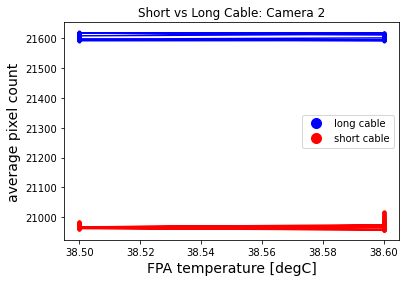

In [89]:
blue_star = mlines.Line2D([], [], marker='o', linestyle='None',
                          markersize=10,color = 'blue', label='long cable')
red_star = mlines.Line2D([], [], marker='o', linestyle='None',
                          markersize=10,color = 'red',label='short cable')


plt.title('Short vs Long Cable: Camera 2')
plt.legend(handles=[blue_star, red_star])
plt.plot(temps1,y12, color="blue", marker=".")
plt.xlabel("FPA temperature [degC]",fontsize=14)
plt.ylabel("average pixel count",fontsize=14)
plt.plot(temps1,y22,color="red",marker=".")
plt.show()

In [90]:
diff1= []
diff2= []
for i in range(200):
    av1 = y11[i]-y21[i]
    av2 = y12[i]-y22[i]
    diff1.append(av1)
    diff2.append(av2)

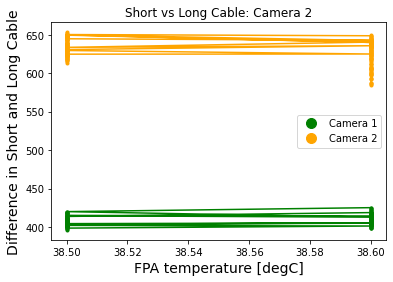

In [91]:
blue_star = mlines.Line2D([], [], marker='o', linestyle='None',
                          markersize=10,color = 'green', label='Camera 1')
red_star = mlines.Line2D([], [], marker='o', linestyle='None',
                          markersize=10,color = 'orange',label='Camera 2')


plt.title('Short vs Long Cable: Camera 2')
plt.legend(handles=[blue_star, red_star])
plt.plot(temps1,diff1, color="green", marker=".")
plt.xlabel("FPA temperature [degC]",fontsize=14)
plt.ylabel("Difference in Short and Long Cable",fontsize=14)
plt.plot(temps1,diff2,color="orange",marker=".")
plt.show()